In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

2023-03-20 13:00:01.588433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

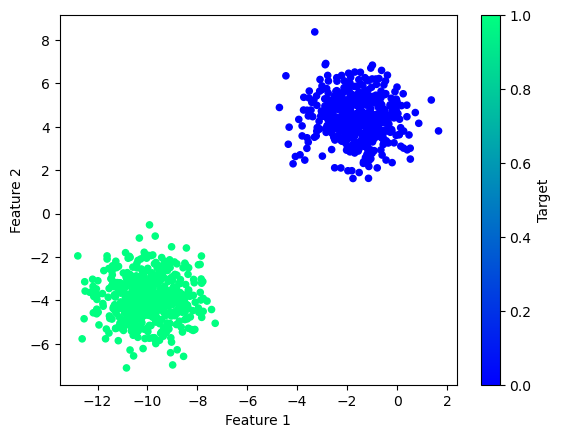

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

# Create df with data
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Plot data
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [3]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# Scaler
X_scaler = skl.preprocessing.StandardScaler()

# Fit scaler
X_scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create Keras Sequential model
nn_model = tf.keras.models.Sequential()

2023-03-20 13:08:01.474815: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Add our first Dense layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [8]:
# Add output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [9]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile Sepuential model and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 4ms/step - loss: 0.4349 - accuracy: 0.9787
Epoch 2/100
24/24 [==============================] - 0s 8ms/step - loss: 0.4229 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4111 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 13ms/step - loss: 0.3998 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.3889 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.3784 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.3684 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.3494 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.3405 - accuracy: 1.0000
Epoch 11

<AxesSubplot:>

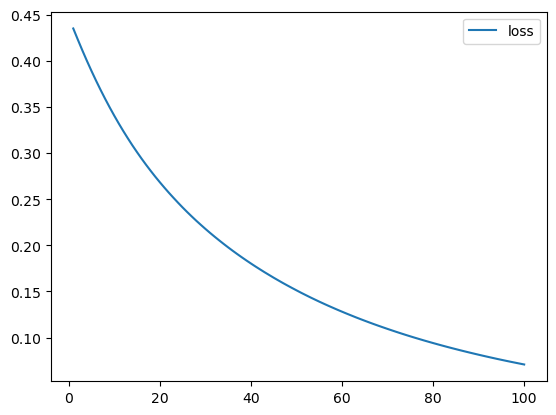

In [12]:
# Create DF containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss'])+1))

# plot the loss
history_df.plot(y='loss')

<AxesSubplot:>

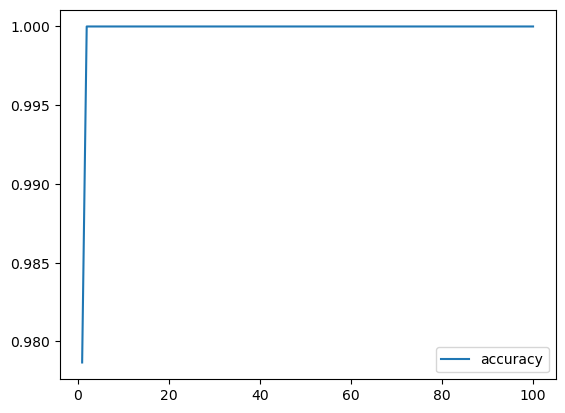

In [13]:
# Plot accuracy
history_df.plot(y='accuracy')

In [15]:
# Evaluate model using test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

8/8 - 0s - loss: 0.0745 - accuracy: 1.0000 - 498ms/epoch - 62ms/step
Loss: 0.07448171079158783, Accuracy: 1.0


In [16]:
# Predict classificatio of a new set of blob data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=1)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype('int32')

1/1 [==============================] - 0s 149ms/step


array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

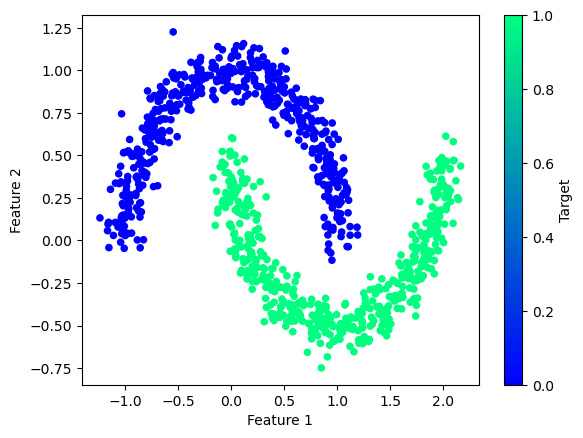

In [17]:
from sklearn.datasets import make_moons

# Create dummy moon data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=1)

# Transform y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating DF to plot data
df_moons = pd.DataFrame(X_moons, columns=['Feature 1', 'Feature 2'])
df_moons['Target'] = y_moons

# Plot data
df_moons.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=1
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [19]:
# Train model with data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 2s 4ms/step - loss: 0.6795 - accuracy: 0.7480
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6109 - accuracy: 0.7640
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.5691 - accuracy: 0.7760
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.5411 - accuracy: 0.7787
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5212 - accuracy: 0.7840
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5055 - accuracy: 0.7840
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4936 - accuracy: 0.7853
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4826 - accuracy: 0.7893
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4737 - accuracy: 0.7947
Epoch 10/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4656 - accuracy: 0.7947
Epoch 11/

<AxesSubplot:>

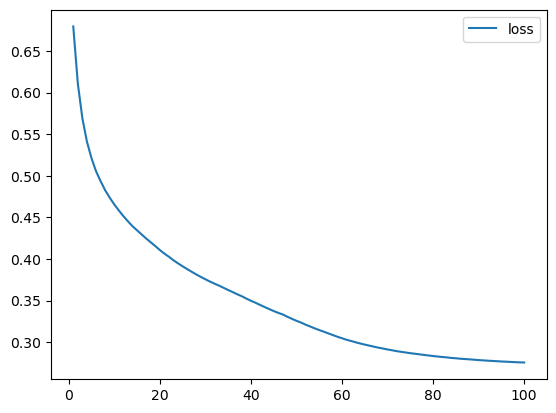

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

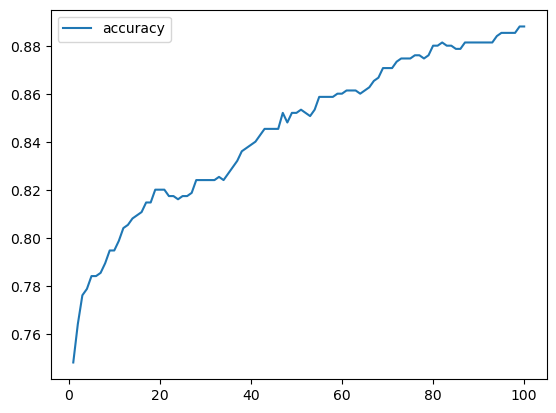

In [21]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [22]:
# Generate new Sequential model
new_model = tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 2s 9ms/step - loss: 0.6101 - accuracy: 0.7613
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 0.5832 - accuracy: 0.7787
Epoch 3/100
24/24 [==============================] - 0s 10ms/step - loss: 0.5608 - accuracy: 0.7893
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5422 - accuracy: 0.8013
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5257 - accuracy: 0.8040
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.5114 - accuracy: 0.8107
Epoch 7/100
24/24 [==============================] - 0s 10ms/step - loss: 0.4984 - accuracy: 0.8160
Epoch 8/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4863 - accuracy: 0.8200
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4747 - accuracy: 0.8280
Epoch 10/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4633 - accuracy: 0.8347
Epoch 1